In [1]:
#from keras.utils import to_categorical
#from keras_preprocessing.image import load_img
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#import os
#import pandas as pd
#import numpy as np
##dont use it

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [6]:
print(train)

                                  image      label
0            images/train\angry\im0.png      angry
1            images/train\angry\im1.png      angry
2           images/train\angry\im10.png      angry
3          images/train\angry\im100.png      angry
4         images/train\angry\im1000.png      angry
...                                 ...        ...
28704  images/train\surprised\im995.png  surprised
28705  images/train\surprised\im996.png  surprised
28706  images/train\surprised\im997.png  surprised
28707  images/train\surprised\im998.png  surprised
28708  images/train\surprised\im999.png  surprised

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [8]:
print(test)
print(test['image'])

                               image      label
0          images/test\angry\im0.png      angry
1          images/test\angry\im1.png      angry
2         images/test\angry\im10.png      angry
3        images/test\angry\im100.png      angry
4        images/test\angry\im101.png      angry
...                              ...        ...
7173  images/test\surprised\im95.png  surprised
7174  images/test\surprised\im96.png  surprised
7175  images/test\surprised\im97.png  surprised
7176  images/test\surprised\im98.png  surprised
7177  images/test\surprised\im99.png  surprised

[7178 rows x 2 columns]
0            images/test\angry\im0.png
1            images/test\angry\im1.png
2           images/test\angry\im10.png
3          images/test\angry\im100.png
4          images/test\angry\im101.png
                     ...              
7173    images/test\surprised\im95.png
7174    images/test\surprised\im96.png
7175    images/test\surprised\im97.png
7176    images/test\surprised\im98.png
7177    i

In [9]:
from tqdm.notebook import tqdm

In [10]:
#def extract_features(images):
#    features = []
#    for image in tqdm(images):
#        img = load_img(image,grayscale =  True )
#        img = np.array(img)
#        features.append(img)
#    features = np.array(features)
#    features = features.reshape(len(features),48,48,1)
#    return features
#   

In [11]:
#from tensorflow.keras.preprocessing.image import load_img
#import numpy as np
#from tqdm.notebook import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # ✅ fix
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

# Make sure train['image'] and test['image'] contain correct image file paths
#train_features = extract_features(train['image'])
#test_features = extract_features(test['image'])

In [12]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
#le = LabelEncoder()
#le.fit(train['label'])

In [17]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#le.fit(pd.concat([train['label'], test['label']]))  # 👈 fit on both
#y_train = le.transform(train['label'])
#y_test = le.transform(test['label'])


In [18]:
le = LabelEncoder()
le.fit(pd.concat([train['label'], test['label']]))
y_train = to_categorical(le.transform(train['label']), num_classes=7)
y_test = to_categorical(le.transform(test['label']), num_classes=7)


In [19]:
print("Classes:", le.classes_)
print("Number of classes:", len(le.classes_))


Classes: ['angry' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Number of classes: 7


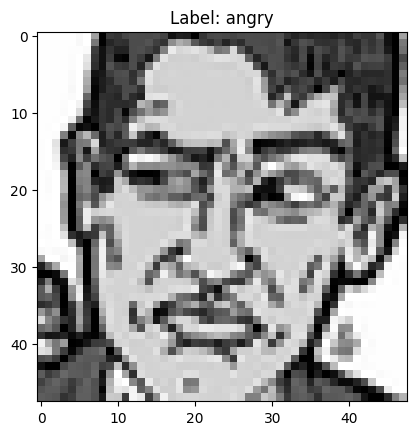

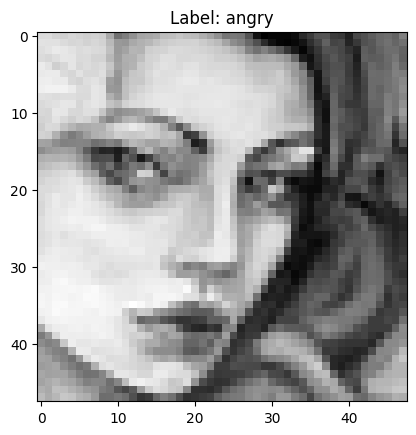

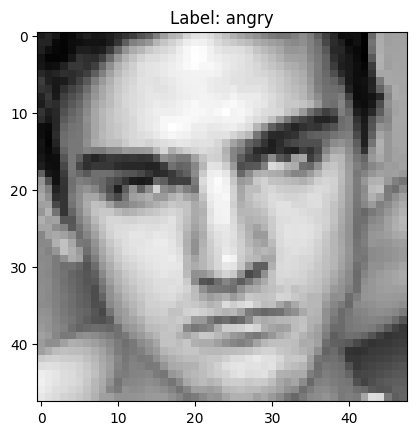

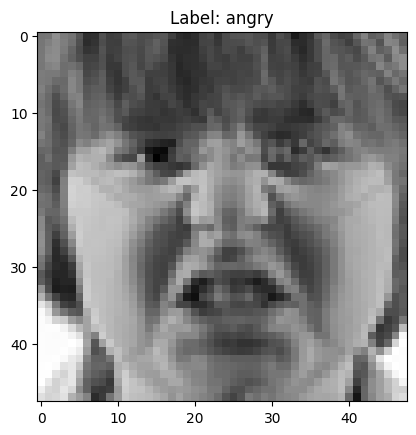

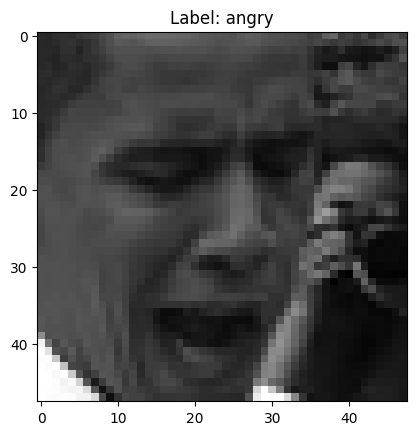

In [20]:
import matplotlib.pyplot as plt
for i in range(5):
    img = x_test[i].reshape(48, 48)
    label = le.inverse_transform([np.argmax(y_test[i])])[0]
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.show()


In [21]:
#y_train = le.transform(train['label'])
#y_test = le.transform(test['label'])

In [22]:
#y_train = to_categorical(y_train,num_classes = 7)
#y_test = to_categorical(y_test,num_classes = 7)

In [23]:
#model = Sequential()
## convolutional layers
#model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))
#
#model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))
#
#model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))
#
#model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))
#
#model.add(Flatten())
## fully connected layers
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.3))
## output layer
#model.add(Dense(7, activation='softmax'))

In [24]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])


C:\Users\Rhitwika Poddar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#model = Sequential()
#model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
#model.add(MaxPooling2D((2,2)))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(len(le.classes_), activation='softmax'))
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


In [26]:
print("Classes:", le.classes_)


Classes: ['angry' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#
#callbacks = [
#    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
#    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
#]
#



In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.2280 - loss: 1.8394 - val_accuracy: 0.2471 - val_loss: 1.8129
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.2507 - loss: 1.8021 - val_accuracy: 0.2916 - val_loss: 1.7195
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.2929 - loss: 1.7224 - val_accuracy: 0.3507 - val_loss: 1.6017
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.3577 - loss: 1.6178 - val_accuracy: 0.4281 - val_loss: 1.4386
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.4121 - loss: 1.5071 - val_accuracy: 0.4575 - val_loss: 1.3983
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.4363 - loss: 1.4513 - val_accuracy: 0.4746 - val_loss: 1.3609
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 524s 2s/step - accuracy: 0.4510 - loss: 1.4189 - val_accuracy: 0.4887 - val_loss: 1.3232
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.4773 - loss: 1.3666 - 

In [30]:
#history = model.fit(
#    x_train, y_train,
#    batch_size=128,
#    epochs=100,.
#    validation_data=(x_test, y_test),
#    callbacks=callbacks
#)


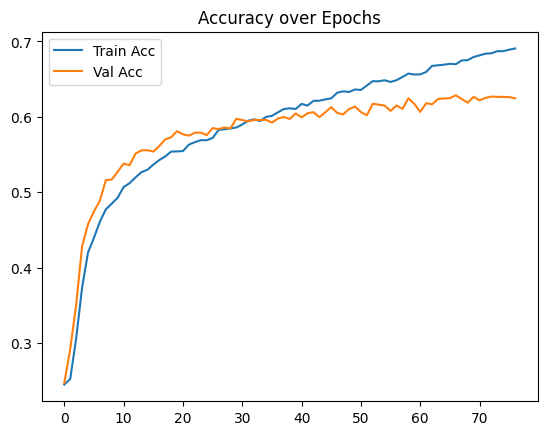

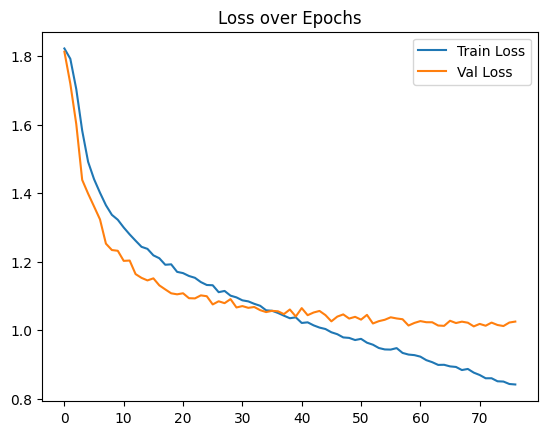

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [33]:
#loss, acc = model.evaluate(x_test, y_test)
#print(f"Test Accuracy: {acc:.2f}")
#
#model.save('final_emotion_model.h5')

In [34]:
from tensorflow.keras.models import load_model

# Load the best model that was saved during training
best_model = load_model('best_model.keras')

# Evaluate the best model on the test data
loss, acc = best_model.evaluate(x_test, y_test)
print(f"✅ Best Model Accuracy: {acc:.2f}")

# Save it with a new name for future use
best_model.save('final_emotion_model.keras')


225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.5579 - loss: 1.1523
✅ Best Model Accuracy: 0.63


In [35]:
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")


Best Validation Accuracy: 0.6286


In [37]:
#model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

In [38]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [39]:
from keras.models import model_from_json

In [40]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [41]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [44]:
#def ef(image):
#    img = load_img(image,grayscale =  True )
#    feature = np.array(img)
#    feature = feature.reshape(1,48,48,1)
#    return feature/255.0
from tensorflow.keras.utils import load_img, img_to_array

def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


In [47]:
import os

base_dir = 'images/train'  # or your new dataset root folder

# List all folders (emotion labels)
print("Emotion categories:", os.listdir(base_dir))

# List images in a specific category
category = 'sad'  # change to 'happy', 'fear', etc. to explore other folders
category_path = os.path.join(base_dir, category)
print("Example images in 'sad':", os.listdir(category_path)[:5])


Emotion categories: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
Example images in 'sad': ['im0.png', 'im1.png', 'im10.png', 'im100.png', 'im1000.png']


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
model prediction is sad


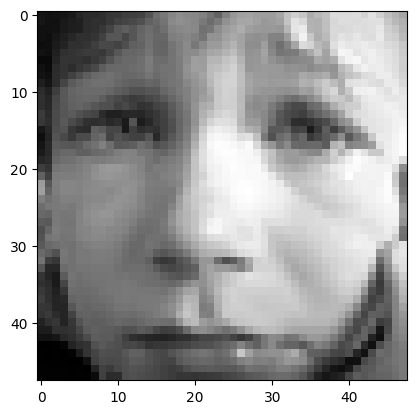

In [48]:
#image = 'images/train/sad/42.jpg'
#print("original image is of sad")
#img = ef(image)
#pred = model.predict(img)
#pred_label = label[pred.argmax()]
#print("model prediction is ",pred_label)

image = 'images/train/sad/im1.png'  # valid path based on your output
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')



In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
model prediction is  sad


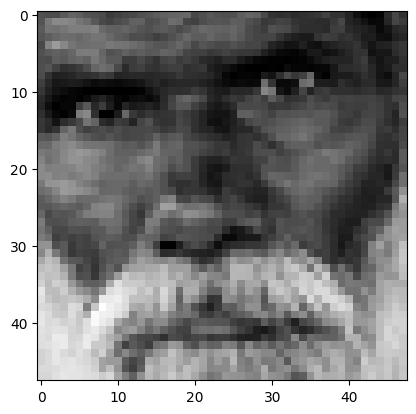

In [50]:
image = 'images/train/sad/im42.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
model prediction is  surprise


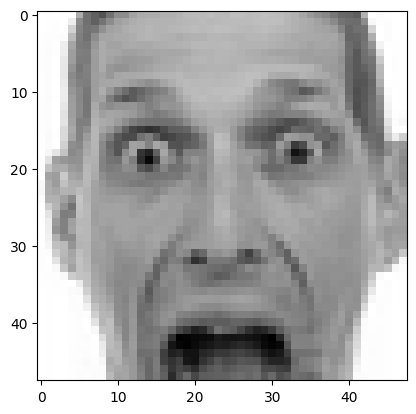

In [52]:
image = 'images/train/fearful/im2.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
model prediction is  angry


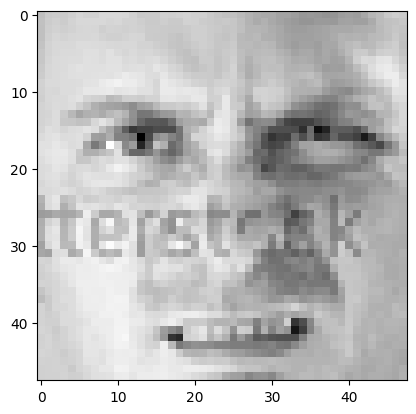

In [54]:
image = 'images/train/disgusted/im299.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
model prediction is  happy


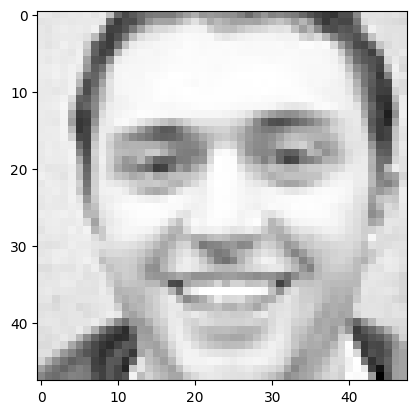

In [55]:
image = 'images/train/happy/im7.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
model prediction is  surprise


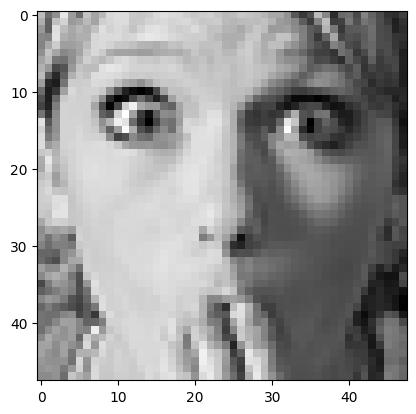

In [56]:
image = 'images/train/surprised/im15.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
model prediction is  neutral


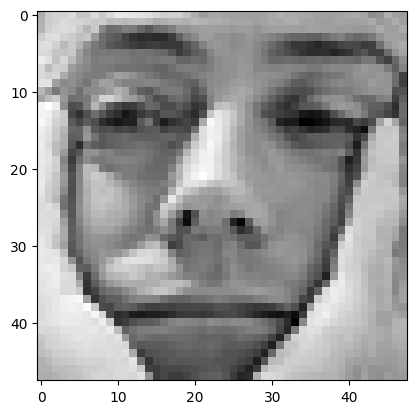

In [58]:
image = 'images/train/neutral/im28.png'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
model prediction is  neutral


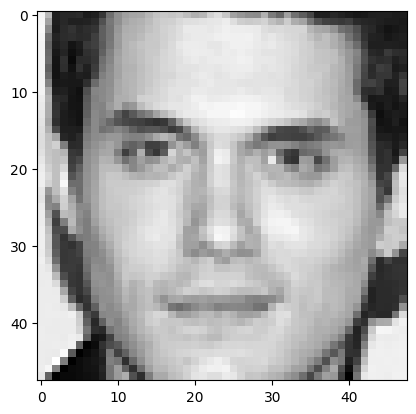

In [60]:
image = 'images/train/neutral/im30.png'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
model prediction is  disgust


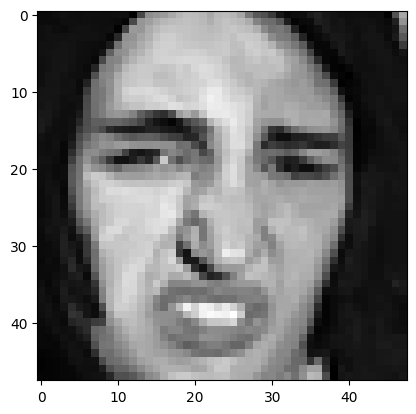

In [61]:
image = 'images/train/disgusted/im29.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
model prediction is  fear


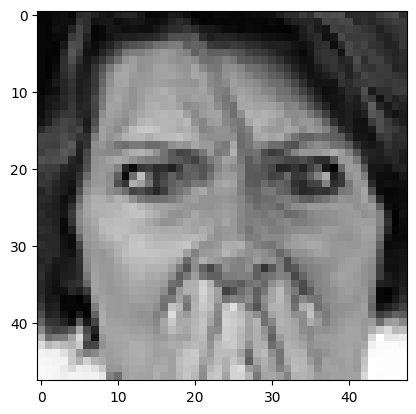

In [62]:
image = 'images/train/fearful/im299.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [66]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step


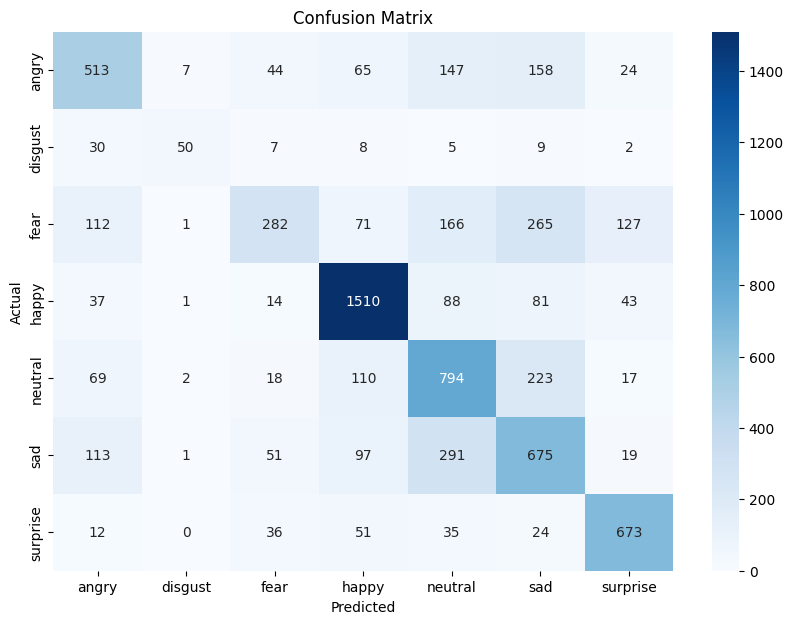

Classification Report:

              precision    recall  f1-score   support

       angry       0.58      0.54      0.56       958
     disgust       0.81      0.45      0.58       111
        fear       0.62      0.28      0.38      1024
       happy       0.79      0.85      0.82      1774
     neutral       0.52      0.64      0.58      1233
         sad       0.47      0.54      0.50      1247
    surprise       0.74      0.81      0.78       831

    accuracy                           0.63      7178
   macro avg       0.65      0.59      0.60      7178
weighted avg       0.63      0.63      0.62      7178



In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Define labels
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=labels))
